In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/melkrewi/Desktop/shrimp/Nauplii_project/TRINITY/")

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [17]:
sinica_vs_fran=pd.read_csv("fran_sinica_1to1.txt",sep="\s+",header=None)
sinica_DE_nauplii=pd.read_csv("kallisto_sinica.gene.counts.matrix.female_vs_male.DESeq2.DE_results",sep="\s+")
fran_DE_nauplii=pd.read_csv("kallisto_fran.gene.counts.matrix.female_vs_male.DESeq2.DE_results",sep="\s+")
fran_DE_nauplii_RSEM=pd.read_csv("RSEM.gene.counts.matrix.female_vs_male.DESeq2.DE_results",sep="\s+")
sinica_DE_nauplii_RSEM=pd.read_csv("RSEM_sinica.gene.counts.matrix.female_vs_male.DESeq2.DE_results",sep="\s+")

In [32]:
merged_fran=pd.merge(fran_DE_nauplii,fran_DE_nauplii_RSEM,on="gene")
merged_fran[['log2FoldChange_x','log2FoldChange_y']].corr(method='pearson')

,log2FoldChange_x,log2FoldChange_y
log2FoldChange_x,1.000000,0.676123
log2FoldChange_y,0.676123,1.000000


In [33]:
merged_sinica=pd.merge(sinica_DE_nauplii,sinica_DE_nauplii_RSEM,on="gene")
merged_sinica[['log2FoldChange_x','log2FoldChange_y']].corr(method='pearson')

,log2FoldChange_x,log2FoldChange_y
log2FoldChange_x,1.000000,0.637013
log2FoldChange_y,0.637013,1.000000


In [102]:
merged_fran[['log2FoldChange_x','log2FoldChange_y']].corr(method='pearson')

,log2FoldChange_x,log2FoldChange_y
log2FoldChange_x,1.000000,0.676123
log2FoldChange_y,0.676123,1.000000


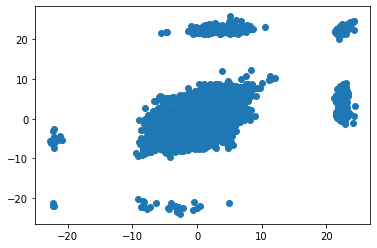

In [34]:
plt.scatter(merged_sinica['log2FoldChange_x'],merged_sinica['log2FoldChange_y'])

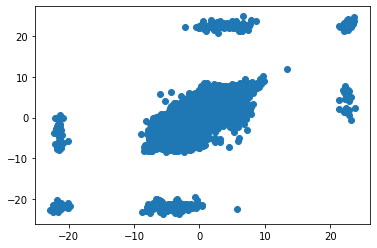

In [99]:
plt.scatter(merged_fran['log2FoldChange_x'],merged_fran['log2FoldChange_y'])

In [6]:
merged_1=pd.merge(sinica_DE_nauplii,sinica_vs_fran,left_on='gene',right_on=0)
merged_2=pd.merge(merged_1,fran_DE_nauplii,left_on=1,right_on='gene')
merged_1_RSEM=pd.merge(sinica_DE_nauplii_RSEM,sinica_vs_fran,left_on='gene',right_on=0)
merged_2_RSEM=pd.merge(merged_1_RSEM,fran_DE_nauplii_RSEM,left_on=1,right_on='gene')
#merged_2=merged_2[(np.log2(merged_2['baseMean_x'])>5)&(np.log2(merged_2['baseMean_y'])>5)]
#merged_2=merged_2[(np.log2(merged_2['baseMean_x'])>5)&(np.log2(merged_2['baseMean_y'])>5)]

Text(0, 0.5, 'logFC fran')

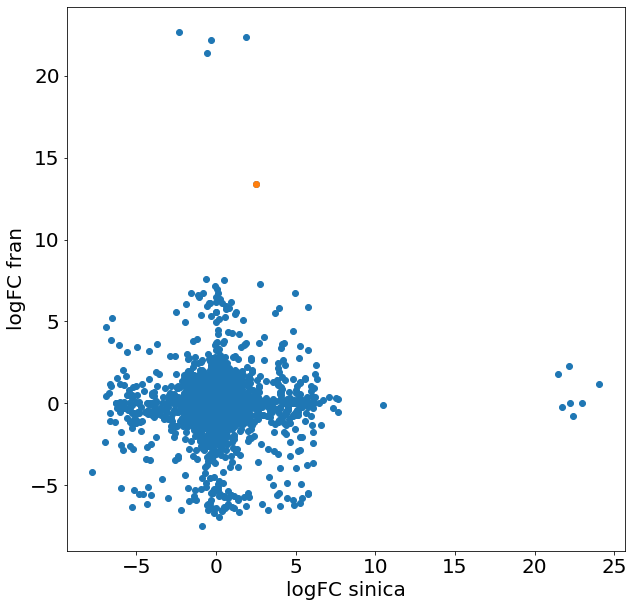

In [5]:
plt.figure(figsize=(10, 10))
#plt.scatter(merged_limma_2['logFC_x'],merged_limma_2['logFC_y'],c= np.where(((merged_limma_2['adj.P.Val_x']<0.1)&(merged_limma_2['adj.P.Val_y']<0.1)),'r','b'))
plt.scatter(merged_2['log2FoldChange_x'],merged_2['log2FoldChange_y'])
plt.scatter(merged_2[(merged_2['padj_x']<0.05)&(merged_2['padj_y']<0.05)]['log2FoldChange_x'],merged_2[(merged_2['padj_x']<0.05)&(merged_2['padj_y']<0.05)]['log2FoldChange_y'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('logFC sinica',fontsize=20)
plt.ylabel('logFC fran',fontsize=20)
#plt.legend()

In [55]:
merged_2[(merged_2['padj_x']<0.01)&(merged_2['padj_y']<0.01)]#['gene_y']

,gene_x,sampleA_x,sampleB_x,baseMeanA_x,baseMeanB_x,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,...,sampleA_y,sampleB_y,baseMeanA_y,baseMeanB_y,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y
6,TRINITY_DN30218_c0_g3,female,male,413.836824,70.804831,217.818542,2.548786,0.388653,6.558005,5.453237e-11,...,female,male,1865.054921,0.0,932.52746,13.414073,0.794046,16.893326,5.038140e-64,2.567940e-59


(array([  6.,  23.,  13.,  22.,  17.,   8.,  19.,  33.,  37.,  43.,  53.,
         69.,  84., 112., 102., 118., 124., 175., 142., 161., 138., 143.,
        157., 153., 151., 189., 142., 174., 157., 175., 177., 160., 187.,
        177., 177., 200., 177., 170., 166., 169., 173., 153., 148., 158.,
        142., 124., 123., 130., 118., 111.,  86.,  90.,  74.,  70.,  64.,
         72.,  48.,  49.,  36.,  46.,  32.,  17.,  16.,  29.,  18.,  24.,
         14.,   9.,  15.,  10.,   9.,   4.,   4.,   6.,   4.,   3.,   2.,
          3.,   1.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.08339339,  0.26769928,  0.45200518,  0.63631108,  0.82061698,
         1.00492287,  1.18922877,  1.37353467,  1.55784057,  1.74214647,
         1.92645236,  2.11075826,  2.29506416,  2.47937006,  2.66367596,
         2.84798185,  3.03228775,  3.21659365,  3.40089955,  3.58520544,
         3.76951134,  3.95

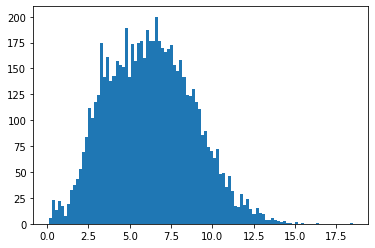

In [40]:
plt.hist(np.log2(merged_2['baseMean_x']),bins=100)

In [18]:
f_vs_s=pd.read_csv("fran_vs_sinica.blat.sorted.besthit",sep="\s+")
s_vs_f=pd.read_csv("sinica_vs_fran.blat.sorted.besthit",sep="\s+")

In [19]:
fs_merged=pd.merge(f_vs_s,s_vs_f,left_on='Qname',right_on='Tname')

In [20]:
fs_merged_2=fs_merged[fs_merged['Qname_y']==fs_merged['Tname_x']]

In [21]:
#merged_1=pd.merge(sinica_DE_nauplii,fs_merged_2,left_on='gene',right_on='Qname_x')
#merged_2=pd.merge(merged_1,fran_DE_nauplii,left_on='Tname_x',right_on='gene')
merged_1=pd.merge(sinica_DE_nauplii,fs_merged_2,left_on='gene',right_on='Qname_x')
merged_2=pd.merge(merged_1,fran_DE_nauplii,left_on='Tname_x',right_on='gene')
merged_1_RSEM=pd.merge(sinica_DE_nauplii,fs_merged_2,left_on='gene',right_on='Qname_x')
merged_2_RSEM=pd.merge(merged_1_RSEM,fran_DE_nauplii_RSEM,left_on='Tname_x',right_on='gene')
#merged_2=merged_2[(np.log2(merged_2['baseMean_x'])>5)&(np.log2(merged_2['baseMean_y'])>5)]

Text(0, 0.5, 'logFC fran')

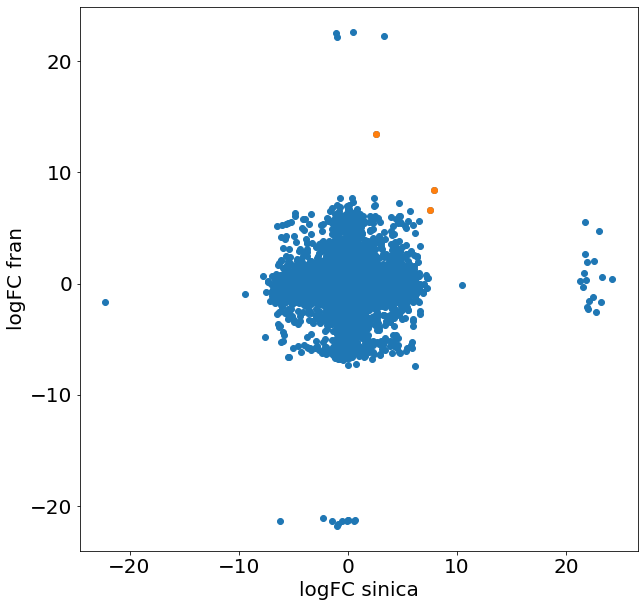

In [22]:
plt.figure(figsize=(10, 10))
#plt.scatter(merged_limma_2['logFC_x'],merged_limma_2['logFC_y'],c= np.where(((merged_limma_2['adj.P.Val_x']<0.1)&(merged_limma_2['adj.P.Val_y']<0.1)),'r','b'))
plt.scatter(merged_2['log2FoldChange_x'],merged_2['log2FoldChange_y'])
plt.scatter(merged_2[(merged_2['padj_x']<0.05)&(merged_2['padj_y']<0.05)]['log2FoldChange_x'],merged_2[(merged_2['padj_x']<0.05)&(merged_2['padj_y']<0.05)]['log2FoldChange_y'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('logFC sinica',fontsize=20)
plt.ylabel('logFC fran',fontsize=20)
#plt.legend()

In [27]:
merged_2[(merged_2['padj_x']<0.1)&(merged_2['padj_y']<0.1)]

,gene_x,sampleA_x,sampleB_x,baseMeanA_x,baseMeanB_x,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,...,sampleA_y,sampleB_y,baseMeanA_y,baseMeanB_y,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y
10,TRINITY_DN15420_c0_g1,female,male,58.433935,0.113870,25.108184,7.898277,1.066645,7.404785,1.313633e-13,...,female,male,59.931834,0.0,29.965917,8.456236,1.096809,7.709855,1.259609e-14,6.633505e-12
13,TRINITY_DN30218_c0_g3,female,male,413.836824,70.804831,217.818542,2.548786,0.388653,6.558005,5.453237e-11,...,female,male,1865.054921,0.0,932.527460,13.414073,0.794046,16.893326,5.038140e-64,2.567940e-59
19,TRINITY_DN6049_c0_g2,female,male,35.338842,0.000000,15.145218,7.533153,1.316225,5.723301,1.044741e-08,...,female,male,17.089389,0.0,8.544694,6.641994,1.770293,3.751919,1.754864e-04,2.152717e-02


Text(0, 0.5, 'logFC fran')

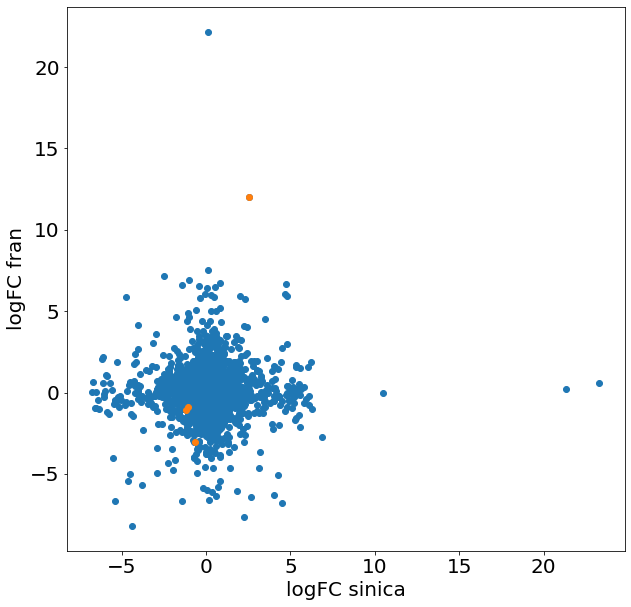

In [23]:
plt.figure(figsize=(10, 10))
#plt.scatter(merged_limma_2['logFC_x'],merged_limma_2['logFC_y'],c= np.where(((merged_limma_2['adj.P.Val_x']<0.1)&(merged_limma_2['adj.P.Val_y']<0.1)),'r','b'))
plt.scatter(merged_2_RSEM['log2FoldChange_x'],merged_2_RSEM['log2FoldChange_y'])
plt.scatter(merged_2_RSEM[(merged_2_RSEM['padj_x']<0.05)&(merged_2_RSEM['padj_y']<0.05)]['log2FoldChange_x'],merged_2_RSEM[(merged_2_RSEM['padj_x']<0.05)&(merged_2_RSEM['padj_y']<0.05)]['log2FoldChange_y'])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('logFC sinica',fontsize=20)
plt.ylabel('logFC fran',fontsize=20)
#plt.legend()

In [28]:
merged_2_RSEM[(merged_2_RSEM['padj_x']<0.05)&(merged_2_RSEM['padj_y']<0.05)]

,gene_x,sampleA_x,sampleB_x,baseMeanA_x,baseMeanB_x,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,...,sampleA_y,sampleB_y,baseMeanA_y,baseMeanB_y,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y
2,TRINITY_DN3456_c0_g1,female,male,6973.463298,15637.540007,11924.364275,-1.165078,0.111816,-10.419634,2.017280e-25,...,female,male,4237.784816,8818.979600,6528.382208,-1.057301,0.183758,-5.753769,8.727521e-09,5.558406e-07
7,TRINITY_DN30218_c0_g3,female,male,413.836824,70.804831,217.818542,2.548786,0.388653,6.558005,5.453237e-11,...,female,male,713.534509,0.000000,356.767255,12.006583,0.783874,15.316987,5.888430e-53,1.245079e-48
33,TRINITY_DN60214_c0_g1,female,male,717.315029,1123.733880,949.554372,-0.647966,0.169359,-3.825983,1.302515e-04,...,female,male,8.579970,70.649554,39.614762,-3.022877,0.414863,-7.286442,3.182466e-13,2.919377e-11
35,TRINITY_DN33787_c1_g2,female,male,2855.287752,5866.365778,4575.903767,-1.038823,0.277939,-3.737601,1.857842e-04,...,female,male,8558.634787,15624.411643,12091.523215,-0.868337,0.229614,-3.781724,1.557462e-04,8.758447e-03
